<a href="https://colab.research.google.com/github/DATA3750/WeeklyDemo/blob/main/Wk7_Python_PowerBI_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PowerBI with  Python Notebook

## Outline


<div class="alert alert-block alert-info" style="margin-top: 20px">
    
1. [Create a Python script](#1)<br>
2. [Use Python with Power Query Editor](#2)<br>
3. [Create Power BI visuals with Python](#3)<br>
4. [Get started with Azure Maps Power BI visual](#3)<br>
5. [ML](#5)<br>
    
</div>
<hr>

## Create a Python script <a id="1"></a>
___________

Create a script in your local Python development environment and make sure it runs successfully. To prepare and run a Python script in Power BI Desktop, there are a few limitations:

Only pandas data frames import, so make sure the data you want to import to Power BI is represented in a data frame.
Any Python script that runs longer than 30 minutes times out.
Interactive calls in the Python script, such as waiting for user input, halt the script's execution.
If you set a working directory within the Python script, you must define a full path to the working directory rather than a relative path.
Nested tables aren't supported.

In [ ]:
import pandas as pd
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'])
df['Age'] = df['Age'].astype(float)
print (df)

     Name   Age
0    Alex  10.0
1     Bob  12.0
2  Clarke  13.0


## Use Python with Power Query Editor <a id="2"></a>
________


In [ ]:
import pandas as pd
completedData = dataset.fillna(method='backfill', inplace=False)
dataset["completedValues"] =  completedData["SMI missing values"]

This line fills in missing values in the "dataset" dataframe using the backfill method. The backfill method fills missing values with the next valid value in the column. The filled data is stored in a new dataframe called "completedData".

>Note that the "inplace=False" argument in the fillna() function means that the original dataframe "dataset" is not modified in place, and the filled data is stored in the new "completedData" dataframe. If you set inplace=True, the original "dataset" dataframe would be modified in place instead of creating a new "completedData" dataframe.

## Create Power BI visuals with Python <a id="3"></a>

___________

### Limitations

Python visuals in Power BI Desktop have the following limitations:

The data the Python visual uses for plotting is limited to 150,000 rows. If more than 150,000 rows are selected, only the top 150,000 rows are used, and a message appears on the image. The input data also has a limit of 250 MB.

If the input dataset of a Python visual has a column that contains a string value longer than 32,766 characters, that value is truncated.

All Python visuals display at 72 DPI resolution.

If a Python visual calculation exceeds five minutes, the execution times out, which results in an error.

As with other Power BI Desktop visuals, if you select data fields from different tables with no defined relationship between them, an error occurs.

Python visuals refresh upon data updates, filtering, and highlighting. The image itself isn't interactive.

Python visuals respond to highlighting elements in other visuals, but you can't select elements in the Python visual to cross-filter other elements.

Only plots to the Python default display device display correctly on the canvas. Avoid explicitly using a different Python display device.

Python visuals don't support renaming input columns. Columns are referred to by their original names during script execution.

In [ ]:
import pandas as pd 
dataset = pd.DataFrame({ 
    'Fname':['Harry','Sally','Paul','Abe','June','Mike','Tom'], 
    'Age':[21,34,42,18,24,80,22], 
    'Weight': [180, 130, 200, 140, 176, 142, 210], 
    'Gender':['M','F','M','M','F','M','M'], 
    'State':['Washington','Oregon','California','Washington','Nevada','Texas','Nevada'],
    'Children':[4,1,2,3,0,2,0],
    'Pets':[3,2,2,5,0,1,5] 
}) 
print (dataset)

   Fname  Age  Weight Gender       State  Children  Pets
0  Harry   21     180      M  Washington         4     3
1  Sally   34     130      F      Oregon         1     2
2   Paul   42     200      M  California         2     2
3    Abe   18     140      M  Washington         3     5
4   June   24     176      F      Nevada         0     0
5   Mike   80     142      M       Texas         2     1
6    Tom   22     210      M      Nevada         0     5


>Tips

Your Python script can use only fields that are added to the Values section. You can add or remove fields while you work on your Python script. Power BI Desktop automatically detects field changes. As you select or remove fields from the Values section, supporting code in the Python script editor is automatically generated or removed.

In some cases, you might not want automatic grouping to occur, or you might want all rows to appear, including duplicates. In those cases, you can add an index field to your dataset that causes all rows to be considered unique and prevents grouping.

You can access columns in the dataset by using their names. For example, you can code dataset["Age"] in your Python script to access the age field.

Power BI Desktop replots the visual when you select Run from the Python script editor title bar, or whenever a data change occurs due to data refresh, filtering, or highlighting.

When you run a Python script that results in an error, the Python visual isn't plotted, and an error message appears on the canvas. For error details, select See details in the message.

To get a larger view of the visualizations, you can minimize the Python script editor.

### Scatterplot

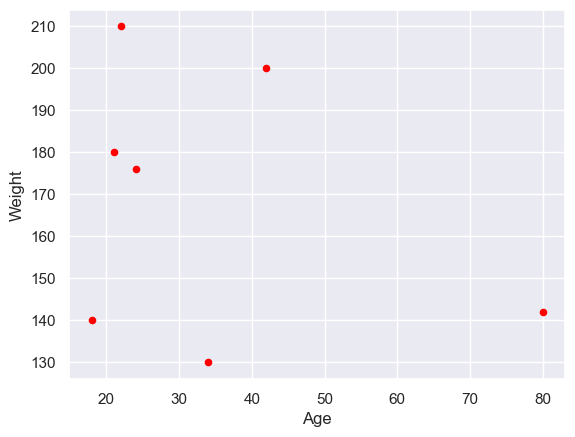

In [ ]:
import matplotlib.pyplot as plt 
dataset.plot(kind='scatter', x='Age', y='Weight', color='red')
plt.show()

### Create a line plot with multiple columns

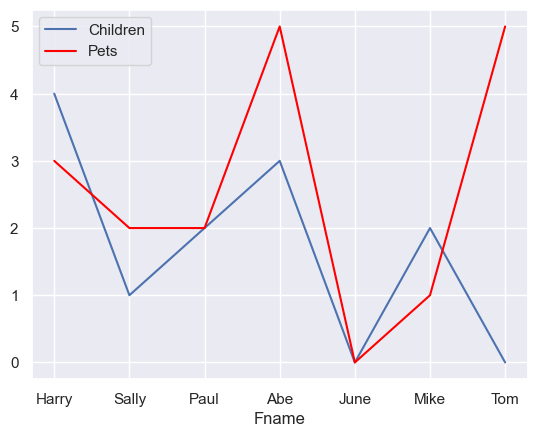

In [ ]:
import matplotlib.pyplot as plt 
ax = plt.gca() 
dataset.plot(kind='line',x='Fname',y='Children',ax=ax) 
dataset.plot(kind='line',x='Fname',y='Pets', color='red', ax=ax) 
plt.show()

### Create a bar plot

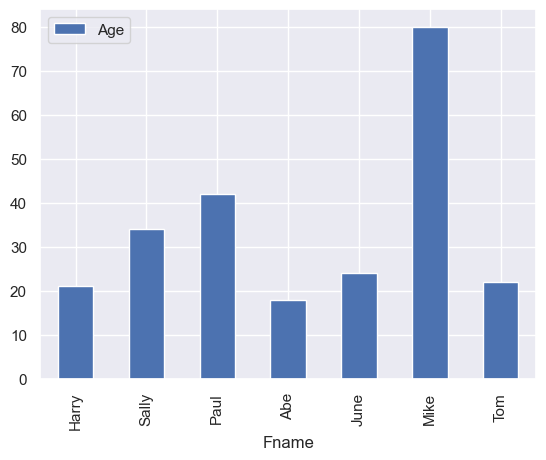

In [ ]:
import matplotlib.pyplot as plt 
dataset.plot(kind='bar',x='Fname',y='Age') 
plt.show()

### Seaborn

In [ ]:
import seaborn as sns
dataset = sns.load_dataset("tips")

Then we load the dataset and have a quick look at the structure.

So we basically have
* total_bill: the total amount spend
* tip: the tip given
* sex: the sex of the guest who gave the tip
* day: the weekday
* time: the daytime
* size: the number of guests at this meal

Note that our tips dataset is a pandas DataFrame.

We establish a uniform theme for all plots by using the default theme.

With a barplot we can aggregate categorical data of a function. For example, we can distinguish between sex in the total_bill variable.

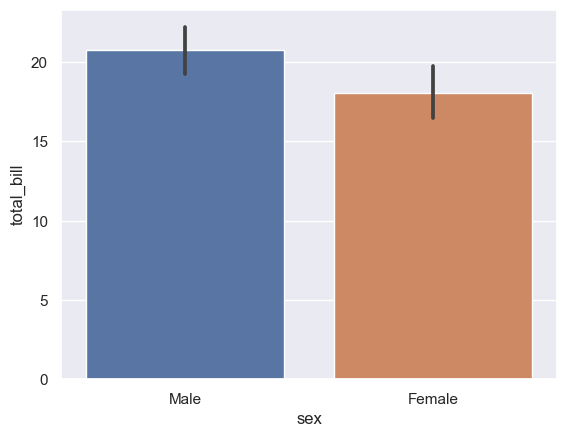

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x="sex", y="total_bill", data=dataset)
plt.show()

An easy way to plot subsets is using the `FacetGrid.map()` method. For example, the distribution of tips for different times.

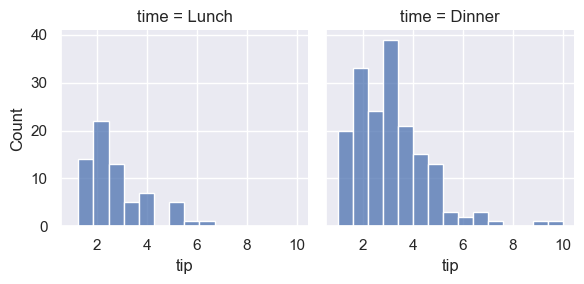

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
t = sns.FacetGrid(dataset, col="time")
t.map(sns.histplot, "tip")
plt.show()

The combination of a histogram with the kernel density estimation is possible with the `distplot()`. However, distplot is a deprecated function and will be removed in a future version. Alternatively, we can use the `histplot()` and set the kde to True.

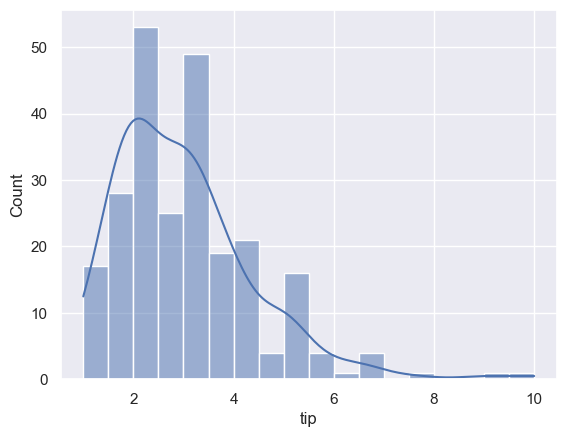

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(dataset['tip'], kde=True)
plt.show()

With the jointplot two distplots can be united and further adjusted. For example, the correlation between total_bill and tip could be intresting.

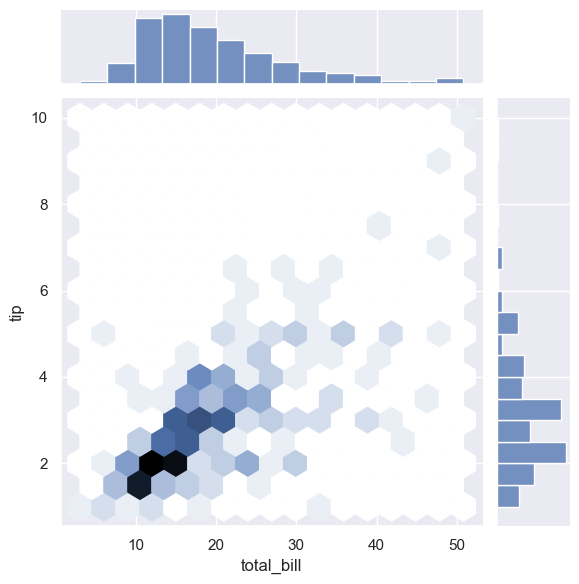

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.jointplot(x='total_bill',y='tip',data = dataset, kind = 'hex')
plt.show()

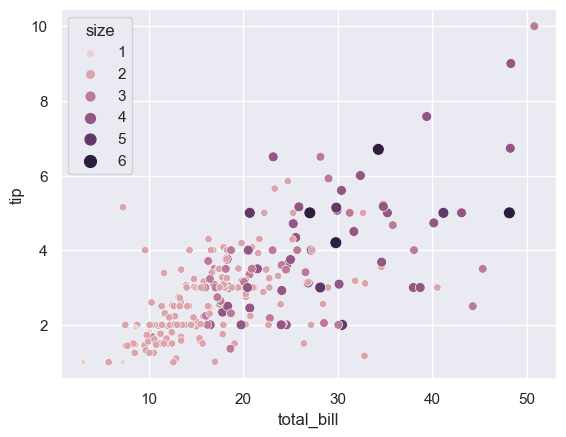

In [ ]:
import seaborn as sns
import matplotlib.pyplot as lib

ax = sns.scatterplot(x="total_bill", y="tip", hue ="size", size= "size", data=dataset)
lib.show(ax)

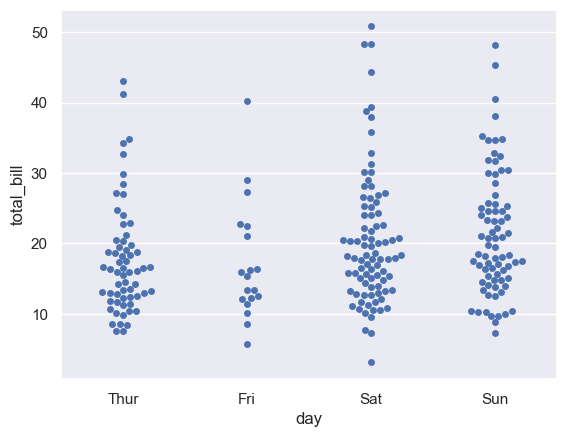

In [ ]:
import seaborn as sns
import matplotlib.pyplot as lib

ax = sns.swarmplot(x="day", y="total_bill", data=dataset)
lib.show(ax)

The distinction in categorical variables can also be integrated into the jointplot. For example, lets distinguish between the sex and smoker variables.

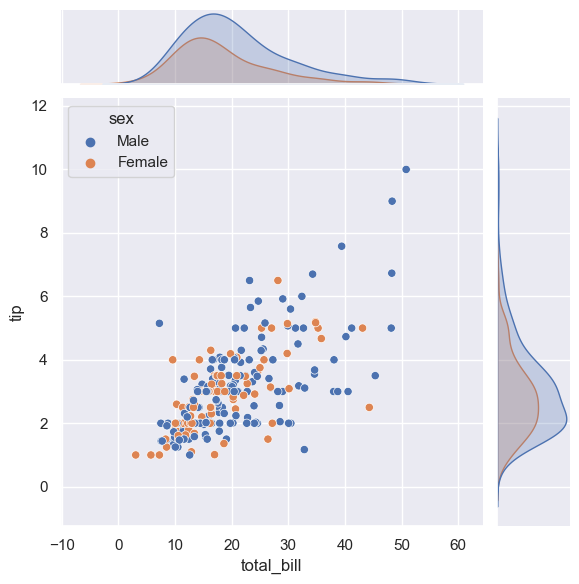

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.jointplot(x='total_bill', y='tip',data = dataset, hue = 'sex')
plt.show()

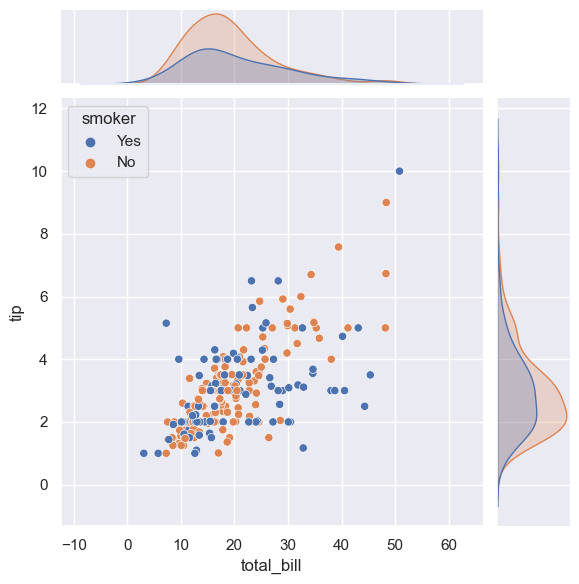

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.jointplot(x='total_bill', y='tip',data = dataset, hue = 'smoker')
plt.show()

A boxplot shows the distribution of categorical data in a way that facilitates comparisons. The box corresponds to the area in which the middle 50% of the data lies. It is therefore bounded by the upper and lower quartiles. Outliers are displayed as dots.

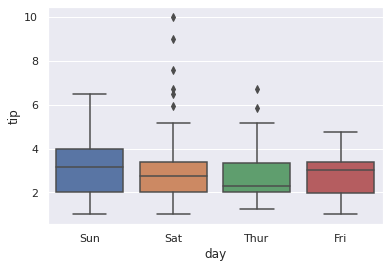

In [ ]:
sns.boxplot(x='day', y='tip', data = tips)
plt.show()

Similar to boxplots are stripplots, which represent categorical variables as a scatterplot.

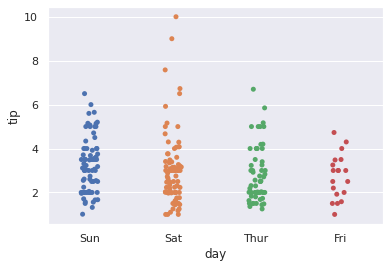

In [ ]:
sns.stripplot(x='day', y='tip', data = tips)
plt.show()

Finally, we can use the heatmap to show the correlation of the variables.

C:\Users\DONGY\AppData\Local\Temp\ipykernel_29552\2336563774.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()  #create a correlation matrix using the .corr function


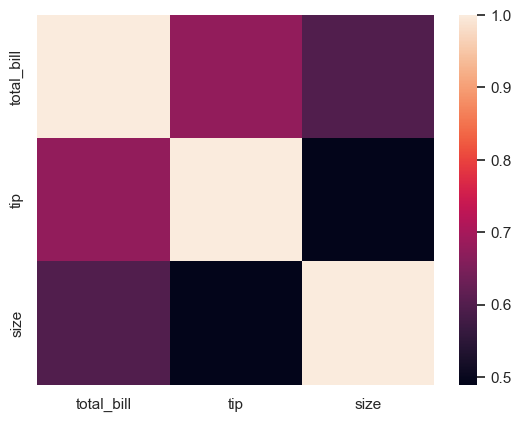

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
 
corr_matrix = dataset.corr()  #create a correlation matrix using the .corr function
sns.heatmap(corr_matrix, annot=False) #create a seaborn heatmap using the correlation matrix, with the values showing as the annotation
plt.show() #this is required by Power BI to show the visual

Another way to represent the correlation of variables is the pairplot. The pairplot diagram shows pairwise relations in a complete dataframe.

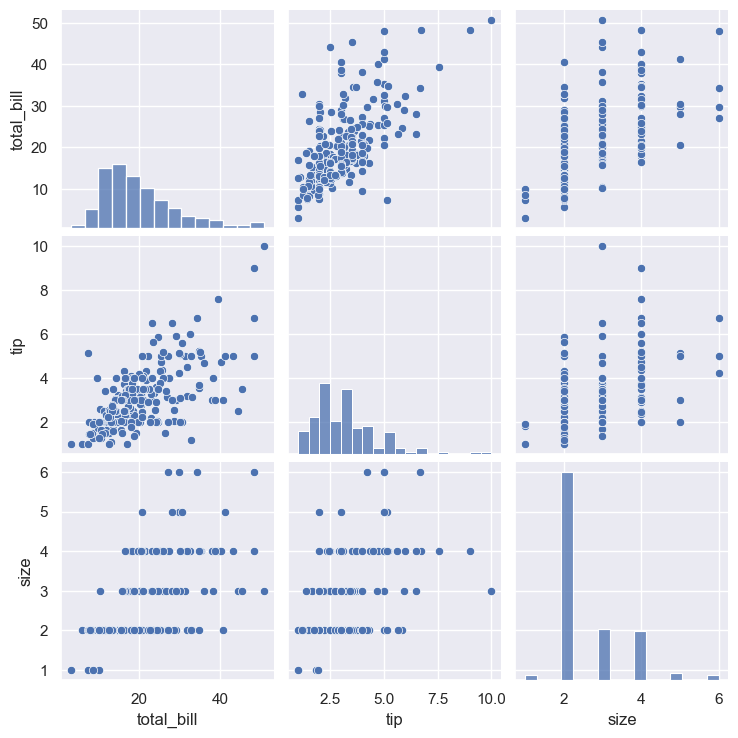

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(dataset)
plt.show()

### 3D Color Map

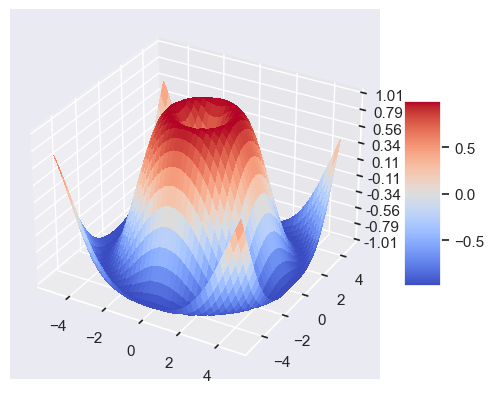

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Get started with Azure Maps Power BI visual <a id="4"></a>
________

The Azure Maps Power BI visual connects to cloud service hosted in Azure to retrieve location data such as map images and coordinates that are used to create the map visualization.

Details about the area the map is focused on are sent to Azure to retrieve images needed to render the map canvas (also known as map tiles).
Data in the Location, Latitude, and Longitude buckets may be sent to Azure to retrieve map coordinates (a process called geocoding).
Telemetry data may be collected on the health of the visual (for example, crash reports), if the telemetry option in Power BI is enabled.
Other than the scenarios described above, no other data overlaid on the map is sent to the Azure Maps servers. All rendering of data happens locally within the client.

>You, or your administrator, may need to update your firewall to allow access to the Azure Maps platform that uses the following URL.

     https://atlas.microsoft.com

## ML <a id="5"></a>
_________

Features in our data that attribute to someone leaving the company

    satisfaction level
    evaluations
    promotions
    number of projects,
    time at the company
    department
    accident history
    promotions

**Our Goal**
Create a machine learning model that evaluates the features above and provides a new column of  ‘predictions’ and ‘probability of leaving’ to our existing tables.

In [ ]:
#Load in the dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# load the data which is not needed in POwerbi
dataset = pd.read_csv('HR_exit.csv')

In [ ]:
#lets change categories to numbers
le = LabelEncoder()
dataset['Departments'] = le.fit_transform(dataset['Departments'])
dataset['salary'] = le.fit_transform(dataset['salary'])
#preprocess your data
y=dataset['left']
features = ['satisfaction_level', 'last_evaluation', 'number_project',
'average_montly_hours', 'time_spend_company', 'Work_accident',
'promotion_last_5years', 'Departments', 'salary']

X=dataset[features]
#lets scale the data
s = StandardScaler()
X = s.fit_transform(X)

#split and train the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y)

#Let the model predict results
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred = log.predict(X)
y_prob = log.predict_proba(X)

# Lets add the columns back to the dataframe
dataset['predictions'] = y_pred
dataset['probability of leaving'] = y_prob[:,1]


In [ ]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary,predictions,probability of leaving
0,0.38,0.53,2,157,3,0,1,0,7,1,0,0.474603
1,0.80,0.86,5,262,6,0,1,0,7,2,0,0.194920
2,0.11,0.88,7,272,4,0,1,0,7,2,1,0.602263
3,0.72,0.87,5,223,5,0,1,0,7,1,0,0.183633
4,0.37,0.52,2,159,3,0,1,0,7,1,0,0.485625


In [ ]:
## copy to powerbi
#Load in the dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

#lets change categories to numbers
le = LabelEncoder()
dataset['Departments'] = le.fit_transform(dataset['Departments'])
dataset['salary'] = le.fit_transform(dataset['salary'])
#preprocess your data
y=dataset['left']
features = ['satisfaction_level', 'last_evaluation', 'number_project',
'average_montly_hours', 'time_spend_company', 'Work_accident',
'promotion_last_5years', 'Departments', 'salary']

X=dataset[features]
#lets scale the data
s = StandardScaler()
X = s.fit_transform(X)

#split and train the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y)

#Let the model predict results
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred = log.predict(X)
y_prob = log.predict_proba(X)

# Lets add the columns back to the dataframe
dataset['predictions'] = y_pred
dataset['probability of leaving'] = y_prob[:,1]
